In [2]:
import csv
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

In [3]:
#Ex 1

def read_from_csv(path, number):
    elements = []
    with open(path, mode='r') as file:
        reader = csv.reader(file)
        counter = 0
        for element in reader:
            if element not in elements:
                elements.append(element)
                counter = counter + 1
            if counter == number:
                break
    return elements
#citim din csv

def write_in_csv(data):
    sample = random.sample(data, len(data))
    with open('file.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerows(sample) #scriem datele in csv
    return os.path.abspath('file.csv')

data = ['Ion', 'Marian', 'Popescu', 'Constantin', 'Constatin', 'David']
path = write_in_csv(data)
print(read_from_csv(path, 3))

[['M', 'a', 'r', 'i', 'a', 'n'], ['C', 'o', 'n', 's', 't', 'a', 'n', 't', 'i', 'n'], ['C', 'o', 'n', 's', 't', 'a', 't', 'i', 'n']]


In [4]:
#Ex 2
#a: Distributia este geometrica, intrucat depinde de numarul de steme aruncate pana pica cap
#b:

def game(N, S, weight):
    #N este numar de pasi
    #S este suma care al doilea jucator ii dea primului
    coin_throw = np.random.choice(["Tails", "Heads"], 1, [weight, 1-weight])
    if coin_throw == "Tails":
        dice_roll = random.choice([1, 2, 3, 4, 5, 6]) #sau z din cerinta
        S = S + dice_roll - 3
        N = N + 1
        return N, S
    else: return game(N+1, S-0.5, weight)

print(game(0, 0, 0.5))

(8, -0.5)


-0.005945


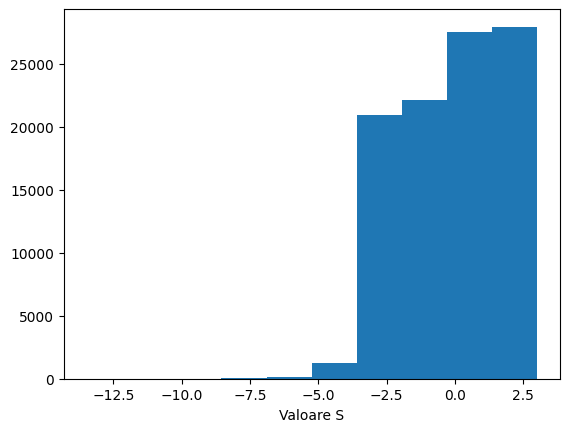

In [5]:
#c

def simulate_games(count, weight):
    #simulate 'count' games with weight 'weight' in throwing the coin
    simulated_games = []

    for i in range(0, count):
        simulated_games.append(game(0, 0, weight))

    return simulated_games

def solve_c(count, weight):
    numbers, sums = map(list, zip(*simulate_games(count, weight)))

    average = sum(sums)/len(sums)
    print(average)

    plt.hist(sums)
    plt.xlabel("Valoare S")
    plt.show()

solve_c(100000, 0.5)

0.00203


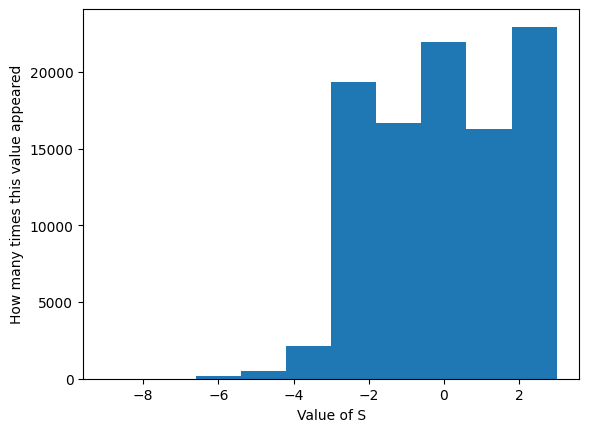

0.00774


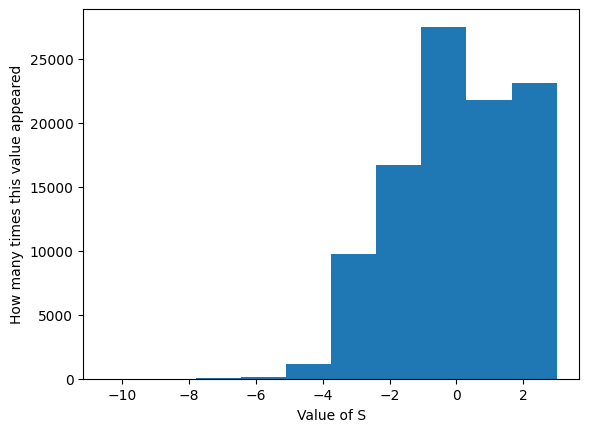

In [138]:
#d
solve_c(100000, 0.3)
solve_c(100000, 0.7)

Valoarea mediei este: 0.3607719678674261
Valoarea deviatiei este: 0.35371920535153123


<Axes: >

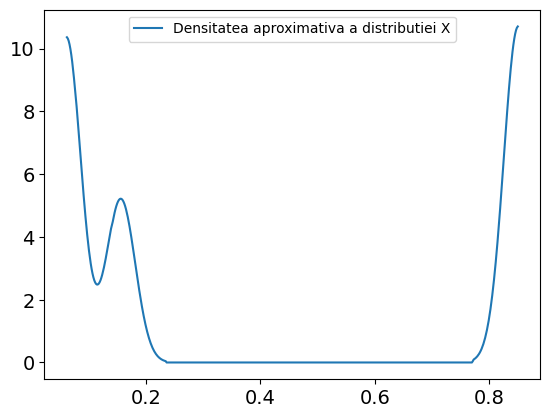

In [7]:
#4
def re(value): #random exponential
    return np.random.exponential(scale=1/value)

X = np.random.choice([re(3), re(6), re(4)], 10000, [3/13, 6/13, 4/13])
#timp de servire al unui client

#medie
mu = sum(X)/len(X)

#deviatie
sigma = np.sqrt(np.sum((X - mu) ** 2)/(len(X) - 1))

print(f"Valoarea mediei este: {mu}")
print(f"Valoarea deviatiei este: {sigma}")
az.plot_kde(X, label="Densitatea aproximativa a distributiei X")

#NU este corect
